# Homework:

This practice problem has a data set that contains NBA players and their invidiual season stats. 

**This practice will take you through fitting a linear model using player stats to estimate winshare and win shares per 48 minutes.**

**Output:**
r2 score and means square error

# Solution:

In [ ]:
!gdown --id 1GmWCm0fZ6IfmMEJZIXHTPa0PVoPgRgy8

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GmWCm0fZ6IfmMEJZIXHTPa0PVoPgRgy8
To: /content/dataLinearRegression.zip
100% 7.79M/7.79M [00:00<00:00, 75.0MB/s]


In [ ]:
!unzip /content/dataLinearRegression.zip

Archive:  /content/dataLinearRegression.zip
  inflating: dataLinearRegression/player_data - player_data.csv  
  inflating: dataLinearRegression/player_data.xlsx  
  inflating: dataLinearRegression/Seasons_Stats.csv  
  inflating: dataLinearRegression/Seasons_Stats.xlsx  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as ss
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [ ]:
seasons_states = pd.read_csv('/content/dataLinearRegression/Seasons_Stats.csv')
player_data = pd.read_csv('/content/dataLinearRegression/player_data - player_data.csv')

In [ ]:
seasons_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     24691 non-null  int64  
 1   Year                           24624 non-null  float64
 2   Player                         24624 non-null  object 
 3   Position                       24624 non-null  object 
 4   Age                            24616 non-null  float64
 5   Team                           24624 non-null  object 
 6   Games                          24624 non-null  float64
 7   GamesStarted                   18233 non-null  float64
 8   MinutesPlayed                  24138 non-null  float64
 9   PlayerEfficiencyRating         24101 non-null  float64
 10  TrueShootingPerct              24538 non-null  float64
 11  ThreePointAttemptRate          18839 non-null  float64
 12  FreeThrowRate                  24525 non-null 

In [ ]:
seasons_states.head()

,Unnamed: 0,Year,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,...,FreeThrowPercentage,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls,Points
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [ ]:
seasons_states.head().T


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Year,1950.0,1950.0,1950.0,1950.0,1950.0
Player,Curly Armstrong,Cliff Barker,Leo Barnhorst,Ed Bartels,Ed Bartels
Position,G-F,SG,SF,F,F
Age,31.0,29.0,25.0,24.0,24.0
Team,FTW,INO,CHS,TOT,DNN
Games,63.0,49.0,67.0,15.0,13.0
GamesStarted,NaN,NaN,NaN,NaN,NaN
MinutesPlayed,NaN,NaN,NaN,NaN,NaN
PlayerEfficiencyRating,NaN,NaN,NaN,NaN,NaN


In [ ]:
player_data.head().T

,0,1,2,3,4
Player,Alaa Abdelnaby,Zaid Abdul-Aziz,Kareem Abdul-Jabbar,Mahmoud Abdul-Rauf,Tariq Abdul-Wahad
year_start,1991,1969,1970,1991,1998
year_end,1995,1978,1989,2001,2003
position,F-C,C-F,C,G,F
height,6-10,6-9,7-2,6-1,6-6
weight,240.0,235.0,225.0,162.0,223.0
birth_date,"June 24, 1968","April 7, 1946","April 16, 1947","March 9, 1969","November 3, 1974"
college,Duke University,Iowa State University,"University of California, Los Angeles",Louisiana State University,San Jose State University


In [ ]:
seasons_states.dropna(axis = 0)

,Unnamed: 0,Year,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,...,FreeThrowPercentage,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls,Points
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5748,5748,1980.0,Larry Bird*,PF,23.0,BOS,82.0,82.0,2955.0,20.5,...,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0
5781,5781,1980.0,M.L. Carr,SF,29.0,BOS,82.0,7.0,1994.0,14.6,...,0.739,106.0,224.0,330.0,156.0,120.0,36.0,143.0,214.0,914.0
5786,5786,1980.0,Don Chaney,SG,33.0,BOS,60.0,0.0,523.0,7.8,...,0.762,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0
5802,5802,1980.0,Dave Cowens*,C,31.0,BOS,66.0,55.0,2159.0,14.8,...,0.779,126.0,408.0,534.0,206.0,69.0,61.0,108.0,216.0,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24685,24685,2017.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,14.9,...,0.523,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [ ]:
seasons_stat = seasons_states.drop(['Player', 'Position', 'Team',], axis=1)

In [ ]:
seasons_stat.dropna(inplace=True)

In [ ]:
seasons_stat.head().T

,5730,5748,5781,5786,5802
Unnamed: 0,5730.000,5748.000,5781.000,5786.000,5802.000
Year,1980.000,1980.000,1980.000,1980.000,1980.000
Age,31.000,23.000,29.000,33.000,31.000
Games,80.000,82.000,82.000,60.000,66.000
GamesStarted,80.000,82.000,7.000,0.000,55.000
MinutesPlayed,2864.000,2955.000,1994.000,523.000,2159.000
PlayerEfficiencyRating,15.300,20.500,14.600,7.800,14.800
TrueShootingPerct,0.574,0.538,0.526,0.402,0.477
ThreePointAttemptRate,0.023,0.098,0.054,0.032,0.013
FreeThrowRate,0.548,0.246,0.316,0.222,0.131


In [ ]:
seasons_stat.dropna(axis = 0)

,Unnamed: 0,Year,Age,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,TrueShootingPerct,ThreePointAttemptRate,FreeThrowRate,...,FreeThrowPercentage,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls,Points
5730,5730,1980.0,31.0,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5748,5748,1980.0,23.0,82.0,82.0,2955.0,20.5,0.538,0.098,0.246,...,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0
5781,5781,1980.0,29.0,82.0,7.0,1994.0,14.6,0.526,0.054,0.316,...,0.739,106.0,224.0,330.0,156.0,120.0,36.0,143.0,214.0,914.0
5786,5786,1980.0,33.0,60.0,0.0,523.0,7.8,0.402,0.032,0.222,...,0.762,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0
5802,5802,1980.0,31.0,66.0,55.0,2159.0,14.8,0.477,0.013,0.131,...,0.779,126.0,408.0,534.0,206.0,69.0,61.0,108.0,216.0,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24685,24685,2017.0,28.0,74.0,74.0,2237.0,14.9,0.562,0.172,0.125,...,0.523,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0
24686,24686,2017.0,24.0,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,27.0,51.0,5.0,525.0,13.0,0.508,0.006,0.247,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24689,24689,2017.0,22.0,44.0,18.0,843.0,6.9,0.503,0.448,0.181,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [ ]:
seasons_stat = seasons_stat.astype(int)

In [ ]:
playerAllStats = pd.merge(seasons_states, player_data, how='left', on='Player')

playerAllStats = playerAllStats[pd.notnull(playerAllStats['Points'])]
playerAllStats = playerAllStats[pd.notnull(playerAllStats['Games'])]
playerAllStats.head()

,Unnamed: 0,Year,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,...,Turnovers,PersonalFouls,Points,year_start,year_end,position,height,weight,birth_date,college
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,1949.0,1951.0,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1950.0,1952.0,G,6-2,185.0,"January 15, 1921",University of Kentucky
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,192.0,438.0,1950.0,1954.0,F-G,6-4,190.0,"May 11, 1924",University of Notre Dame
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,29.0,63.0,1950.0,1951.0,F,6-5,195.0,"October 8, 1925",North Carolina State University
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,27.0,59.0,1950.0,1951.0,F,6-5,195.0,"October 8, 1925",North Carolina State University


In [ ]:
playerAllStats.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Position', 'Age', 'Team', 'Games',
       'GamesStarted', 'MinutesPlayed', 'PlayerEfficiencyRating',
       'TrueShootingPerct', 'ThreePointAttemptRate', 'FreeThrowRate',
       'OffensiveReboundPercentage', 'DefensiveReboundPercentage',
       'TotalReboundPercentage', 'AssistPercentage', 'StealPercentage',
       'BlockPercentage', 'TurnoverPercentage', 'UsagePercentage',
       'OffesniveWinShares', 'DefensiveWinShares', 'WinShares',
       'WinsSharesPer48Minutes', 'OffensiveBoxPlusMinus',
       'DefensiveBoxPlusMinus', 'BoxPlusMinus', 'ValueOverReplacement',
       'FieldGoals', 'FieldGoalAttempts', 'FieldGoalPercentage',
       'ThreePointFieldGoals', 'ThreePointFieldGoalAttempts',
       'ThreePointFieldGoalPercentage', 'TwoPointFieldGoals',
       'TwoPointFieldGoalAttempts', 'TwoPointFieldGoalPercentage',
       'EffectiveFieldGoalPercentage', 'FreeThrows', 'FreeThrowAttempts',
       'FreeThrowPercentage', 'OffensiveRebounds', 'Defensi

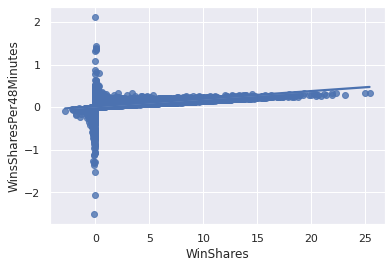

In [ ]:
sns.regplot(x="WinShares", y = "WinsSharesPer48Minutes", data=playerAllStats);

In [ ]:
playerAllStats['WinShares'] = playerAllStats['Points']/ playerAllStats['Games']

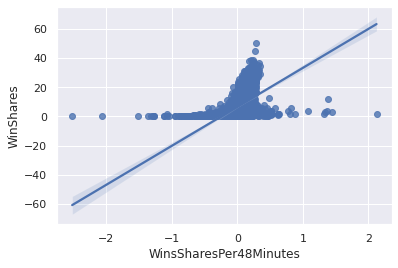

In [ ]:
sns.regplot(x="WinsSharesPer48Minutes", y = "WinShares", data=playerAllStats)

In [ ]:
playerAllStats.describe()

,Unnamed: 0,Year,Age,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,TrueShootingPerct,ThreePointAttemptRate,FreeThrowRate,...,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls,Points,year_start,year_end,weight
count,25230.000000,25230.000000,25222.000000,25230.000000,18713.000000,24741.000000,24704.000000,25142.000000,19338.000000,25128.000000,...,24915.000000,25230.000000,21350.000000,21350.000000,20162.000000,25230.000000,25230.00000,23468.000000,23468.000000,23463.000000
mean,12338.897146,1992.590289,26.677861,50.786603,23.605194,1208.800129,12.471717,0.493199,0.159083,0.325354,...,224.109211,114.828220,39.901686,24.663653,74.005109,116.284859,509.59021,1989.652420,1997.627024,212.260154
std,7104.556111,17.349359,3.849780,26.528281,28.646042,941.290156,6.036486,0.094486,0.187961,0.221949,...,227.654545,135.727138,38.675911,37.419027,67.756478,84.868590,492.94445,16.653492,17.516837,26.259078
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1947.000000,1947.000000,133.000000
25%,6218.250000,1981.000000,24.000000,27.000000,0.000000,338.000000,9.800000,0.458000,0.005000,0.208000,...,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.00000,1979.000000,1986.000000,190.000000
50%,12310.500000,1996.000000,26.000000,57.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.295000,...,159.000000,68.000000,29.000000,11.000000,55.000000,108.000000,363.00000,1992.000000,2001.000000,212.000000
75%,18482.750000,2007.000000,29.000000,75.000000,45.000000,1970.000000,15.600000,0.544000,0.289000,0.400000,...,321.000000,160.000000,60.000000,29.000000,113.000000,183.000000,778.00000,2003.000000,2013.000000,230.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.00000,2018.000000,2018.000000,360.000000


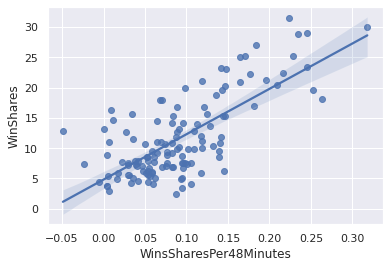

In [ ]:
playerAllStats_2016 = playerAllStats.loc[(playerAllStats['Year'] >= 2016) &(playerAllStats['Games'] >= 48)]

playerAllStats_2016_PG = playerAllStats_2016[playerAllStats_2016['Position'].str.contains('PG')].reset_index(drop=True)
sns.regplot(x="WinsSharesPer48Minutes", y = "WinShares", data=playerAllStats_2016_PG)

In [ ]:
playerAllStats_2016PG_WinShare = playerAllStats_2016_PG['WinsSharesPer48Minutes']
playerAllStats_2016PG_PPG = playerAllStats_2016_PG['WinShares']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(playerAllStats_2016_PG['WinShares'],
                                              playerAllStats_2016_PG['WinsSharesPer48Minutes'], test_size=0.2, random_state=42)

NameError: ignored

In [ ]:
classifier = SVC(kernel='linear', random_state = 0)

In [ ]:
classifier.fit(X_train.values.reshape(-1, 1).astype(int), Y_train.values.reshape(-1, 1).astype(int))
classifier.score(X_train.values.reshape(-1, 1), Y_train.values.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
X = X_train.values.reshape(-1, 1)
Y = Y_train.values.reshape(-1, 1)

In [ ]:
classifier_prediction = classifier.predict(Y_test.values.reshape(-1, 1))
classifier_predict = pd.DataFrame({'Win Share': Y_test.values, 'Win Share Per 48 Minute': Y_test.values,'Predicted Win Share Per 48 Minute': classifier_prediction.reshape(1, -1)[0]})

AttributeError: ignored

In [ ]:
RMSE = np.sqrt(np.mean(np.square(classifier_predict['Win Share Per 48 Minute'] - 
                                 classifier_predict['Predicted Win Share Per 48 Minute'])))

NameError: ignored

In [ ]:
print(RMSE)

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train.values.reshape(-1, 1), Y_train.values.reshape(-1, 1))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored